<a href="https://colab.research.google.com/github/goldiezhu/BIS634/blob/main/A2/A2_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install bitarray
import bitarray
from hashlib import sha3_256, sha256, blake2b

size = int(1e7)

def my_hash(s):
  return int(sha256(s.lower().encode()).hexdigest(), 16) % size

def my_hash2(s):
  return int(blake2b(s.lower().encode()).hexdigest(), 16) % size

def my_hash3(s):
  return int(sha3_256(s.lower().encode()).hexdigest(), 16) % size

def check():
  check_existence = input("Input a word to see if it is in the Bloom Filter: ")
  check_hash1 = my_hash(check_existence)
  check_hash2 = my_hash2(check_existence)
  check_hash3 = my_hash3(check_existence)
  if data[check_hash1] == False or data[check_hash2] == False or data[check_hash3] == False:
    print(check_existence, "is not in the filter.")
  else:    
    print(check_existence, "is in the filter.")
    

data = bitarray.bitarray(size)
data[:] = False
data1 = bitarray.bitarray(size)
data1[:] = False
data2 = bitarray.bitarray(size)
data2[:] = False
data3 = bitarray.bitarray(size)
data3[:] = False

with open('words.txt') as f:
  for line in f:
    word = line.strip()
    hash1 = my_hash(word)
    hash2 = my_hash2(word)
    hash3 = my_hash3(word)
    data[hash1] = True
    data[hash2] = True
    data[hash3] = True

    data1[hash1] = True

    data2[hash1] = True
    data2[hash2] = True

    data3[hash1] = True
    data3[hash2] = True
    data3[hash3] = True

check()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Input a word to see if it is in the Bloom Filter: 1080
1080 is in the filter.


In [67]:
import string
!pip install ascii
import ascii
import copy

check_word = list(input("Input a word for spelling suggestions: "))
alphabet = string.ascii_lowercase
alphabet_list = [i for i in alphabet]
alphabet_count = 26
possible_words1 = []
possible_words2 = []
possible_words3 = []

def check2(check_existence):
  check_hash1 = my_hash(check_existence)
  check_hash2 = my_hash2(check_existence)
  check_hash3 = my_hash3(check_existence)

  if data1[check_hash1] == True:
    possible_words1.append(check_existence)
  
  if data2[check_hash1] == True and data2[check_hash2] == True:
    possible_words2.append(check_existence)

  if data3[check_hash1] == True and data3[check_hash2] == True and data3[check_hash3] == True:
    possible_words3.append(check_existence)

def print_suggestions():
  print("One Hash")
  print(possible_words1)
  print("Two Hash")
  print(possible_words2)
  print("Three Hash")
  print(possible_words3)

for i in range(len(check_word)):
  for j in range(alphabet_count):
    temp = check_word.copy()
    temp[i] = alphabet_list[j]
    altered_word = "".join(temp)
    check2(altered_word)

print_suggestions()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Input a word for spelling suggestions: floeer
One Hash
['bloeer', 'qloeer', 'fyoeer', 'flofer', 'floter', 'flower', 'floeqr', 'floees']
Two Hash
['fyoeer', 'floter', 'flower']
Three Hash
['floter', 'flower']


In [76]:
import json
with open("typos.json") as f:
  orig_typos_list = json.load(f)

typos_list = []
hash1_suggestions = []
hash2_suggestions = []
hash3_suggestions = []

hash1_count = 0
hash2_count = 0
hash3_count = 0


def check3(check_existence):
  check_hash1 = my_hash(check_existence)
  check_hash2 = my_hash2(check_existence)
  check_hash3 = my_hash3(check_existence)

  if data1[check_hash1] == True:
    hash1_suggestions.append(check_existence)
  
  if data2[check_hash1] == True and data2[check_hash2] == True:
    hash2_suggestions.append(check_existence)

  if data3[check_hash1] == True and data3[check_hash2] == True and data3[check_hash3] == True:
    hash3_suggestions.append(check_existence)

def hash_counts(correct_word, hash1_count, hash2_count, hash3_count):

  if len(hash1_suggestions) <= 3:
    if correct_word in hash1_suggestions:
      hash1_count += 1

  if len(hash2_suggestions) <= 3:
    if correct_word in hash2_suggestions:
      hash2_count += 1

  if len(hash3_suggestions) <= 3:
    if correct_word in hash3_suggestions:
      hash3_count += 1

  hash1_suggestions.clear()
  hash2_suggestions.clear()
  hash3_suggestions.clear()

  return(hash1_count, hash2_count, hash3_count)  

#filter out correct terms
for i in range(len(orig_typos_list)):
  if orig_typos_list[i][0] != orig_typos_list[i][1]:
    typos_list.append(orig_typos_list[i])

#spelling suggestions
for i in range(len(typos_list)):
  specific_typos_string = typos_list[i][0]
  typos_string_list = [i for i in specific_typos_string]
  for j in range(len(typos_string_list)):
    for k in range(alphabet_count):
      temp = typos_string_list.copy()
      temp[j] = alphabet_list[k]
      altered_word = "".join(temp)
      check3(altered_word)
  hash1_count, hash2_count, hash3_count = hash_counts(typos_list[i][1], hash1_count, hash2_count, hash3_count)

print(hash1_count/len(typos_list))
print(hash2_count/len(typos_list))
print(hash3_count/len(typos_list))  

0.00456
0.62092
0.916


#7 bits
0.00456
0.62092
0.916

#8 bits
0.81052
0.9478
0.94808

#9 bits
0.9442
0.94808
0.94808

#10
0.94756
0.94808
0.94808


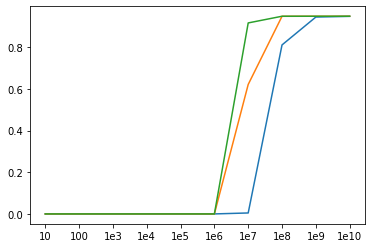

In [79]:
import matplotlib.pyplot as plt
import numpy as np
size = ["10", "100", "1e3", "1e4", "1e5", "1e6", "1e7", "1e8", "1e9", "1e10"]
h1 = [0, 0, 0, 0, 0, 0, 0.00456, 0.81052, 0.9442, 0.94756]
h2 = [0, 0, 0, 0, 0, 0, 0.62092, 0.9478, 0.94808, 0.94808]
h3 = [0, 0, 0, 0, 0, 0, 0.916, 0.94808, 0.94808, 0.94808]
plt.plot(size, h1)
plt.plot(size, h2)
plt.plot(size, h3)